In [1]:
import pandas as pd
import numpy as np
import glob
import matplotlib.pyplot as plt
import seaborn as sns

In [18]:
# File paths to datasets
file_paths = [
    '/content/NIJ2017_FEB01_FEB14.xlsx',
    '/content/NIJ2017_FEB15_FEB21.xlsx',
    '/content/NIJ2017_FEB22_FEB26.xlsx',
    '/content/NIJ2017_FEB27.xlsx',
    '/content/NIJ2017_FEB28.xlsx',
    '/content/NIJ2017_JAN01_JAN31.xlsx',
    '/content/NIJ2017_MAR01_MAR31.xlsx',
    '/content/NIJ2017_MAR01_MAYR31.xlsx'
]

# Initialize an empty list to store DataFrames
dataframes = []

# Load each dataset
for file in file_paths:
    try:
        df = pd.read_excel(file)
        dataframes.append(df)
        print(f"Loaded: {file}")
    except FileNotFoundError:
        print(f"File not found: {file}")
    except Exception as e:
        print(f"Error loading {file}: {e}")

# Merge all dataframes
if dataframes:  # Ensure there are dataframes to merge
    merged_df = pd.concat(dataframes, ignore_index=True)

    # Select relevant columns
    final_df = merged_df[['CATEGORY', 'CALL GROUPS', 'final_case_type', 'CASE DESC', 'occ_date', 'x_coordinate', 'y_coordinate', 'census_tract']]

    # Save the merged dataset
    output_path = '/content/merged_NIJ2017_JAN_MAY.xlsx'
    final_df.to_excel(output_path, index=False)
    print(f"Dataset merged and saved to {output_path}")
else:
    print("No datasets were loaded; nothing to merge.")

Loaded: /content/NIJ2017_FEB01_FEB14.xlsx
Loaded: /content/NIJ2017_FEB15_FEB21.xlsx
Loaded: /content/NIJ2017_FEB22_FEB26.xlsx
Loaded: /content/NIJ2017_FEB27.xlsx
Loaded: /content/NIJ2017_FEB28.xlsx
Loaded: /content/NIJ2017_JAN01_JAN31.xlsx
File not found: /content/NIJ2017_MAR01_MAR31.xlsx
Loaded: /content/NIJ2017_MAR01_MAYR31.xlsx
Dataset merged and saved to /content/merged_NIJ2017_JAN_MAY.xlsx


In [19]:
# Initialize an empty list to store DataFrames
dataframes = []

In [21]:
# Print the first few rows of the merged DataFrame
print("Merged DataFrame:")
print(final_df.head())

# Print all unique categories in the 'CATEGORY' column
categories = final_df['CATEGORY'].unique()
print("\nAll unique categories in the 'CATEGORY' column:")
print(categories)

Merged DataFrame:
        CATEGORY CALL GROUPS final_case_type  \
0  STREET CRIMES    DISORDER          DISTP    
1  STREET CRIMES    DISORDER          DISTP    
2  STREET CRIMES    DISORDER          DISTP    
3  STREET CRIMES    DISORDER          DISTP    
4  STREET CRIMES    DISORDER          DISTP    

                                           CASE DESC   occ_date  x_coordinate  \
0  DISTURBANCE - PRIORITY                        ... 2017-02-01       7642139   
1  DISTURBANCE - PRIORITY                        ... 2017-02-01       7643527   
2  DISTURBANCE - PRIORITY                        ... 2017-02-01       7644834   
3  DISTURBANCE - PRIORITY                        ... 2017-02-01       7665551   
4  DISTURBANCE - PRIORITY                        ... 2017-02-01       7670677   

   y_coordinate  census_tract  
0        679235        5600.0  
1        683935       10600.0  
2        686438        5100.0  
3        692821        2901.0  
4        679049        1602.0  

All unique ca

In [22]:
print(final_df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87630 entries, 0 to 87629
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   CATEGORY         87630 non-null  object        
 1   CALL GROUPS      87630 non-null  object        
 2   final_case_type  87630 non-null  object        
 3   CASE DESC        87630 non-null  object        
 4   occ_date         87630 non-null  datetime64[ns]
 5   x_coordinate     87630 non-null  int64         
 6   y_coordinate     87630 non-null  int64         
 7   census_tract     84008 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(2), object(4)
memory usage: 5.3+ MB
None


In [23]:
print(final_df.isnull().sum())

CATEGORY              0
CALL GROUPS           0
final_case_type       0
CASE DESC             0
occ_date              0
x_coordinate          0
y_coordinate          0
census_tract       3622
dtype: int64


In [24]:
mean_census_tract = final_df['census_tract'].mean()
final_df['census_tract'] = final_df['census_tract'].fillna(mean_census_tract)

# Verify missing values are filled
print(f"Missing values in 'census_tract' after filling: {final_df['census_tract'].isnull().sum()}")


Missing values in 'census_tract' after filling: 0


In [25]:
print("\nPercentage of missing values in each column:")
missing_percentage = (final_df.isnull().sum() / len(final_df)) * 100
print(missing_percentage)


Percentage of missing values in each column:
CATEGORY           0.0
CALL GROUPS        0.0
final_case_type    0.0
CASE DESC          0.0
occ_date           0.0
x_coordinate       0.0
y_coordinate       0.0
census_tract       0.0
dtype: float64


In [26]:
# Get basic statistics for numeric columns
print("\nBasic statistics for numeric columns:")
print(final_df.describe())


Basic statistics for numeric columns:
                            occ_date  x_coordinate   y_coordinate  \
count                          87630  8.763000e+04   87630.000000   
mean   2017-03-20 01:12:00.492982016  7.657923e+06  684518.461315   
min              2017-01-01 00:00:00  7.604367e+06  642430.000000   
25%              2017-02-11 00:00:00  7.644206e+06  676467.000000   
50%              2017-03-21 00:00:00  7.654798e+06  683785.000000   
75%              2017-04-27 00:00:00  7.671894e+06  690253.000000   
max              2017-05-31 00:00:00  7.711820e+06  756602.000000   
std                              NaN  1.695302e+04   12115.764671   

        census_tract  
count   87630.000000  
mean     6768.019165  
min       100.000000  
25%      2303.000000  
50%      5100.000000  
75%      8201.000000  
max    980000.000000  
std     38648.225669  


In [27]:
# Get basic statistics for non-numeric columns
print("\nBasic statistics for non-numeric columns:")
print(final_df.describe(include=['object']))


Basic statistics for non-numeric columns:
       CATEGORY CALL GROUPS final_case_type  \
count     87630       87630           87630   
unique        4           6              88   
top       OTHER    DISORDER          UNWNT    
freq      72754       26674           10299   

                                                CASE DESC  
count                                               87630  
unique                                                 88  
top     UNWANTED PERSON                               ...  
freq                                                10299  


In [28]:
# Check unique values in each column
print("\nUnique values in each column:")
for col in final_df.columns:
    unique_values = final_df[col].unique()
    print(f"{col}: {len(unique_values)} unique values")


Unique values in each column:
CATEGORY: 4 unique values
CALL GROUPS: 6 unique values
final_case_type: 88 unique values
CASE DESC: 88 unique values
occ_date: 151 unique values
x_coordinate: 25540 unique values
y_coordinate: 23710 unique values
census_tract: 172 unique values


In [29]:
# View the distribution of a specific column
print("\nDistribution of values in the 'CATEGORY' column:")
print(final_df['CATEGORY'].value_counts())


Distribution of values in the 'CATEGORY' column:
CATEGORY
OTHER                  72754
STREET CRIMES          13067
MOTOR VEHICLE THEFT     1372
BURGLARY                 437
Name: count, dtype: int64


In [30]:
# Check data types of all columns
print("\nData types of each column:")
print(final_df.dtypes)


Data types of each column:
CATEGORY                   object
CALL GROUPS                object
final_case_type            object
CASE DESC                  object
occ_date           datetime64[ns]
x_coordinate                int64
y_coordinate                int64
census_tract              float64
dtype: object


In [31]:
# Convert `occ_date` to datetime format (if not already)
final_df['occ_date'] = pd.to_datetime(final_df['occ_date'])

# Extract additional features: month, week, and day of the week
final_df['month'] = final_df['occ_date'].dt.month
final_df['week'] = final_df['occ_date'].dt.isocalendar().week
final_df['day_of_week'] = final_df['occ_date'].dt.day_name()


Crime counts by category:
CATEGORY
OTHER                  72754
STREET CRIMES          13067
MOTOR VEHICLE THEFT     1372
BURGLARY                 437
Name: count, dtype: int64

Crime counts by month:
month
5    20018
4    17930
3    17927
1    16388
2    15367
Name: count, dtype: int64


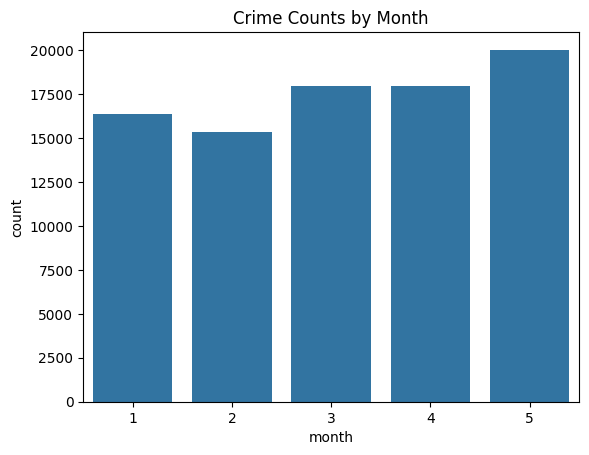

In [32]:
# Analyze patterns and trends
print("\nCrime counts by category:")
print(final_df['CATEGORY'].value_counts())

print("\nCrime counts by month:")
print(final_df['month'].value_counts())

# Visualize trends
sns.countplot(data=final_df, x='month', order=final_df['month'].sort_values().unique())
plt.title("Crime Counts by Month")
plt.show()

<ipython-input-33-fcc407916adf>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=crime_by_day.index, y=crime_by_day.values, palette="viridis")


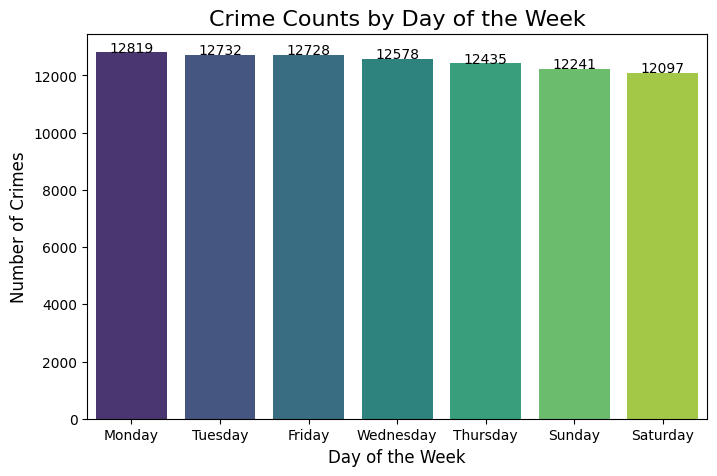

In [33]:
# Count crimes by day of the week
crime_by_day = final_df['day_of_week'].value_counts()

# Plot with data labels
plt.figure(figsize=(8, 5))
sns.barplot(x=crime_by_day.index, y=crime_by_day.values, palette="viridis")
plt.title("Crime Counts by Day of the Week", fontsize=16)
plt.xlabel("Day of the Week", fontsize=12)
plt.ylabel("Number of Crimes", fontsize=12)

# Add data labels
for i, value in enumerate(crime_by_day.values):
    plt.text(i, value + 5, str(value), ha='center', fontsize=10)

plt.show()

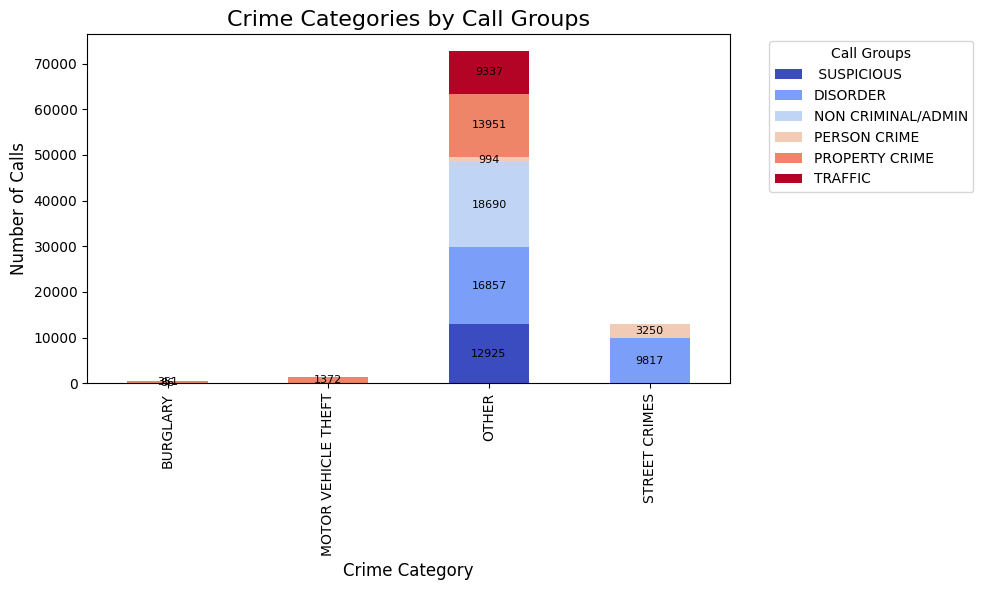

In [34]:
# Group by CATEGORY and CALL GROUPS, and count occurrences
category_call_group = final_df.groupby(['CATEGORY', 'CALL GROUPS']).size().unstack()

# Plot a stacked bar chart
category_call_group.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='coolwarm')
plt.title("Crime Categories by Call Groups", fontsize=16)
plt.xlabel("Crime Category", fontsize=12)
plt.ylabel("Number of Calls", fontsize=12)
plt.legend(title="Call Groups", bbox_to_anchor=(1.05, 1), loc='upper left')

# Show data labels
for i, bar in enumerate(plt.gca().patches):
    height = bar.get_height()
    if height > 0:
        plt.gca().text(bar.get_x() + bar.get_width() / 2., bar.get_y() + height / 2.,
                       f'{int(height)}', ha='center', va='center', fontsize=8)

plt.tight_layout()
plt.show()


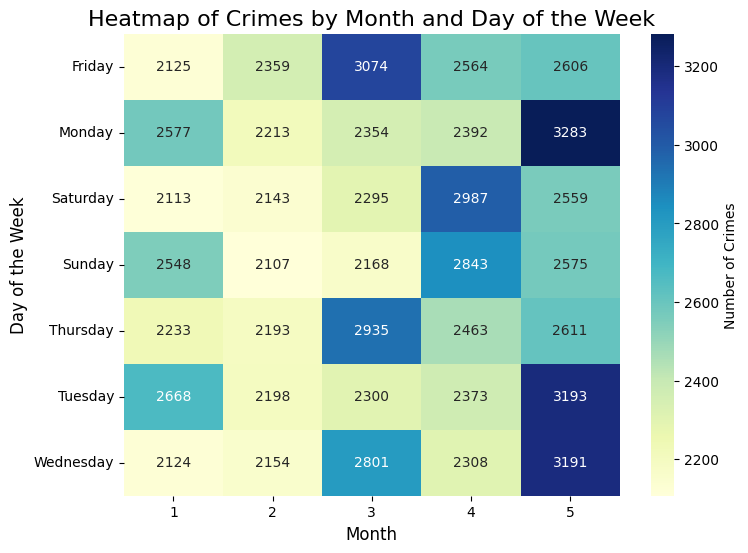

In [35]:
# Create a pivot table for heatmap data
heatmap_data = final_df.pivot_table(index='day_of_week', columns='month', aggfunc='size', fill_value=0)

# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(heatmap_data, annot=True, fmt="d", cmap="YlGnBu", cbar_kws={'label': 'Number of Crimes'})
plt.title("Heatmap of Crimes by Month and Day of the Week", fontsize=16)
plt.xlabel("Month", fontsize=12)
plt.ylabel("Day of the Week", fontsize=12)
plt.show()


In [37]:
from sklearn.model_selection import train_test_split

# Define features and target
features = ['x_coordinate', 'y_coordinate', 'month', 'week']
target = 'CATEGORY'

# Convert categorical 'day_of_week' to numeric using get_dummies
day_dummies = pd.get_dummies(final_df['day_of_week'], prefix='day', drop_first=True)

# Append dummies to the original dataset
final_df = pd.concat([final_df, day_dummies], axis=1)

# Update features to include dummy variables
features.extend(day_dummies.columns)

# Split the data into train and test sets
train_df, test_df = train_test_split(final_df, test_size=0.3, random_state=42, stratify=final_df[target])

X_train = train_df[features]
y_train = train_df[target]

X_test = test_df[features]
y_test = test_df[target]


In [38]:
final_df

,CATEGORY,CALL GROUPS,final_case_type,CASE DESC,occ_date,x_coordinate,y_coordinate,census_tract,month,week,...,day_Sunday,day_Thursday,day_Tuesday,day_Wednesday,day_Monday,day_Saturday,day_Sunday,day_Thursday,day_Tuesday,day_Wednesday
0,STREET CRIMES,DISORDER,DISTP,DISTURBANCE - PRIORITY ...,2017-02-01,7642139,679235,5600.0,2,5,...,False,False,False,True,False,False,False,False,False,True
1,STREET CRIMES,DISORDER,DISTP,DISTURBANCE - PRIORITY ...,2017-02-01,7643527,683935,10600.0,2,5,...,False,False,False,True,False,False,False,False,False,True
2,STREET CRIMES,DISORDER,DISTP,DISTURBANCE - PRIORITY ...,2017-02-01,7644834,686438,5100.0,2,5,...,False,False,False,True,False,False,False,False,False,True
3,STREET CRIMES,DISORDER,DISTP,DISTURBANCE - PRIORITY ...,2017-02-01,7665551,692821,2901.0,2,5,...,False,False,False,True,False,False,False,False,False,True
4,STREET CRIMES,DISORDER,DISTP,DISTURBANCE - PRIORITY ...,2017-02-01,7670677,679049,1602.0,2,5,...,False,False,False,True,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87625,BURGLARY,PROPERTY CRIME,BURGP,BURGLARY - PRIORITY *H ...,2017-05-21,7686181,694571,7300.0,5,20,...,True,False,False,False,False,False,True,False,False,False
87626,BURGLARY,PROPERTY CRIME,BURGP,BURGLARY - PRIORITY *H ...,2017-05-24,7649136,686886,2303.0,5,21,...,False,False,False,True,False,False,False,False,False,True
87627,BURGLARY,PROPERTY CRIME,BURGP,BURGLARY - PRIORITY *H ...,2017-05-29,7618036,690254,7000.0,5,22,...,False,False,False,False,True,False,False,False,False,False
87628,BURGLARY,PROPERTY CRIME,BURGP,BURGLARY - PRIORITY *H ...,2017-05-29,7654282,671015,301.0,5,22,...,False,False,False,False,True,False,False,False,False,False


In [39]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# Train the Random Forest model
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate the model
print("\nModel Classification Report:")
print(classification_report(y_test, y_pred))



Model Classification Report:
                     precision    recall  f1-score   support

           BURGLARY       0.09      0.02      0.03       131
MOTOR VEHICLE THEFT       0.10      0.01      0.02       412
              OTHER       0.83      0.96      0.89     21826
      STREET CRIMES       0.25      0.07      0.11      3920

           accuracy                           0.81     26289
          macro avg       0.32      0.26      0.26     26289
       weighted avg       0.73      0.81      0.76     26289



In [41]:
def calculate_pai(predicted_hotspots, total_crimes, area_of_hotspots, total_area):
    """
    Prediction Accuracy Index (PAI)
    PAI = (Predicted Crime in Hotspots / Total Crime) / (Area of Hotspots / Total Area)
    """
    return (predicted_hotspots / total_crimes) / (area_of_hotspots / total_area)

def calculate_pei(predicted_hotspots, total_predicted_hotspots):
    """
    Prediction Efficiency Index (PEI)
    PEI = Predicted Crime in Hotspots / Total Predicted Hotspots
    """
    return predicted_hotspots / total_predicted_hotspots


In [40]:
import folium
from folium.plugins import HeatMap

#
crime_map = folium.Map(location=[37.7749, -122.4194], zoom_start=12)

# Add crime data to the map
heat_data = list(zip(final_df['y_coordinate'], final_df['x_coordinate']))
HeatMap(heat_data).add_to(crime_map)

# Save the map as an HTML file
crime_map.save('crime_hotspots.html')
print("Crime hotspots map saved as 'crime_hotspots.html'.")


Crime hotspots map saved as 'crime_hotspots.html'.


In [42]:
crime_map

In [44]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# Train the model
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Save the predictions with corresponding test data
forecast_results = test_df.copy()
forecast_results['Predicted_CATEGORY'] = y_pred

# Save results to a CSV file
forecast_results[['x_coordinate', 'y_coordinate', 'month', 'week', 'day_of_week', 'Predicted_CATEGORY']].to_csv('forecast_results.csv', index=False)
print("Forecast results saved as 'forecast_results.csv'")


Forecast results saved as 'forecast_results.csv'


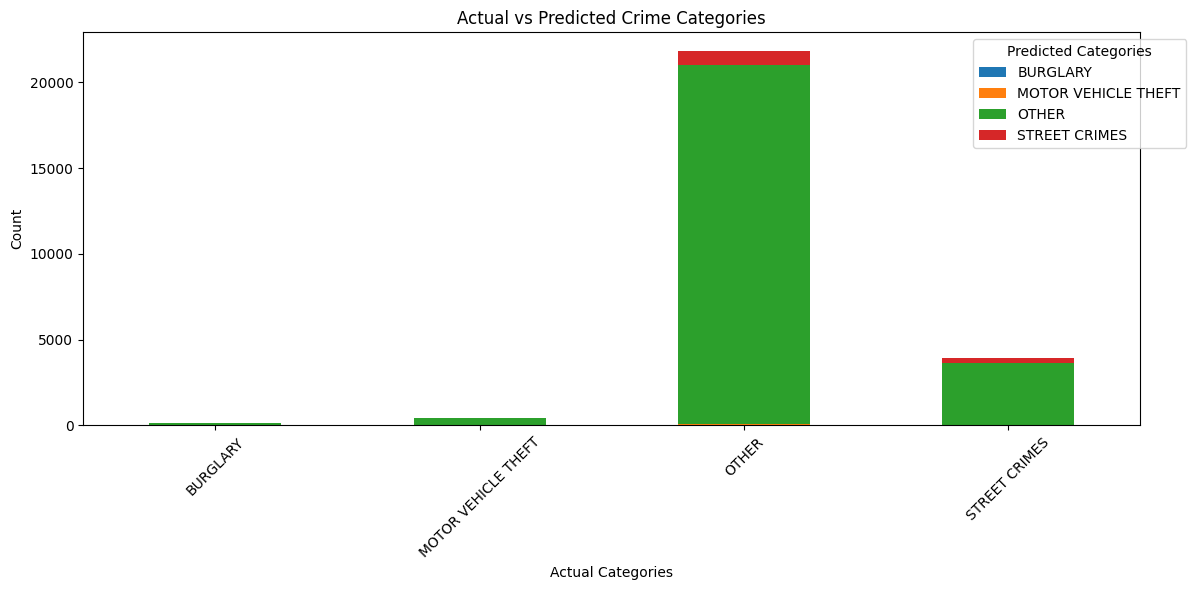

In [45]:
import matplotlib.pyplot as plt
import seaborn as sns

# Group data for actual vs predicted comparison
comparison = forecast_results.groupby(['CATEGORY', 'Predicted_CATEGORY']).size().unstack(fill_value=0)

# Plot the comparison
comparison.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.title('Actual vs Predicted Crime Categories')
plt.xlabel('Actual Categories')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Predicted Categories', bbox_to_anchor=(1.05, 1))
plt.tight_layout()
plt.show()


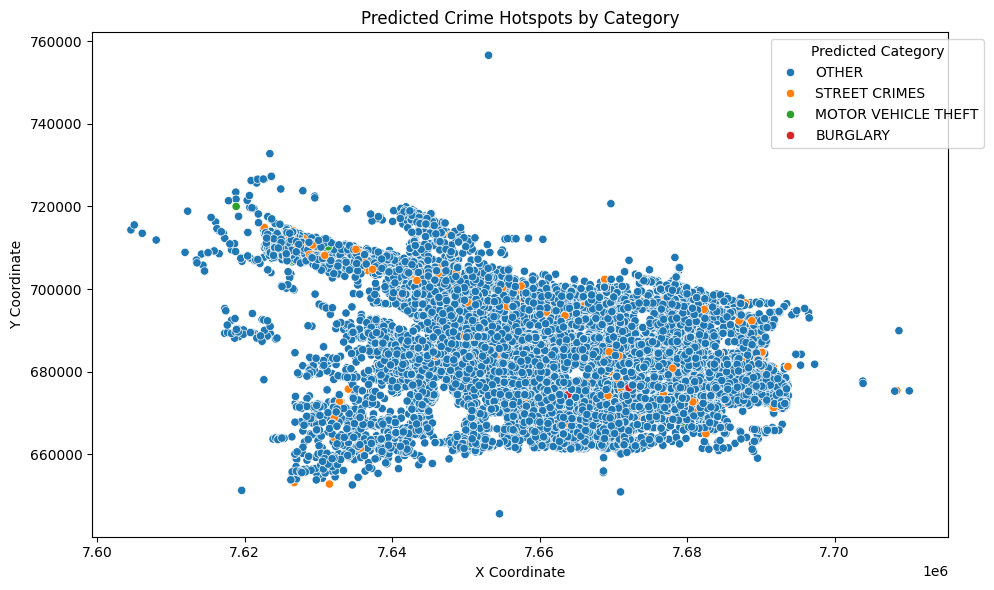

In [46]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=forecast_results, x='x_coordinate', y='y_coordinate', hue='Predicted_CATEGORY', palette='tab10')
plt.title('Predicted Crime Hotspots by Category')
plt.xlabel('X Coordinate')
plt.ylabel('Y Coordinate')
plt.legend(title='Predicted Category', bbox_to_anchor=(1.05, 1))
plt.tight_layout()
plt.show()
